# soilgrids

This package provides a minimal wrapper for the ISRIC Soilgrids API, allowing 
users to query soil properties by latitude/longitude and perform basic 
analyses on the returned data.

Functions:

*   `get_soilgrids()`: Provides a simple wrapper for the /properties/query
    API endpoint, parsing the geojson response into a pandas DataFrame.
        
Classes:

*   `SoilGrids()`: Provides methods for reading data from Soilgrids and basic 
    including utilities for aggregating and analysing the returned data.

Useful links:

*   Documentation for the API: <https://rest.isric.org/soilgrids/v2.0/docs>
*   ISRIC REST entry page, including fair use policy: <https://rest.isric.org>
*   ISRIC data and software policy: <https://www.isric.org/about/data-policy>
*   Soilgrids FAQ: <https://www.isric.org/explore/soilgrids/faq-soilgrids>

## Querying data using `SoilGrids`

The following code reads in the mean values for clay, sand, silt and organic 
carbon stock (ocs) in the top 30cm of soil for a random set of 50 points 
within roughly 25km of 
[Herning, Denmark](https://en.wikipedia.org/wiki/Herning). Note that points can 
be queried at a maximum rate of 5/minute, so the following code takes about 10 
minutes to run:

In [1]:
import logging
import pandas as pd
from IPython.display import Markdown as md
from soilgrids import SoilGrids

# Turn off console logs for cleaner notebook output
logging.getLogger('soilgrids').setLevel(logging.ERROR)

# Helper for displaying tables as markdown
show = lambda df: display(md(df.to_markdown(index=False)))

sg = SoilGrids()

sg.get_points_sample(
    50,
    lat_a=56.225297, lon_a=8.662215,
    lat_b=55.958103, lon_b=9.354390,
    soil_property=['clay', 'sand', 'silt', 'ocs'],
    depth=['0-5cm', '5-15cm', '15-30cm', '0-30cm'],
    value='mean'
)

# For brevity, only a subset of the data is shown
show(sg.data[0:15].filter([
    'lat', 'lon', 'soil_property', 'mapped_units', 
    'target_units', 'depth', 'mean'
]))

|     lat |     lon | soil_property   | mapped_units   | target_units   | depth   |   mean |
|--------:|--------:|:----------------|:---------------|:---------------|:--------|-------:|
| 56.0024 | 9.17168 | clay            | g/kg           | %              | 0-5cm   |     93 |
| 56.0024 | 9.17168 | clay            | g/kg           | %              | 5-15cm  |     90 |
| 56.0024 | 9.17168 | clay            | g/kg           | %              | 15-30cm |     85 |
| 56.0024 | 9.17168 | ocs             | t/ha           | kg/m²          | 0-30cm  |     69 |
| 56.0024 | 9.17168 | sand            | g/kg           | %              | 0-5cm   |    802 |
| 56.0024 | 9.17168 | sand            | g/kg           | %              | 5-15cm  |    804 |
| 56.0024 | 9.17168 | sand            | g/kg           | %              | 15-30cm |    820 |
| 56.0024 | 9.17168 | silt            | g/kg           | %              | 0-5cm   |    105 |
| 56.0024 | 9.17168 | silt            | g/kg           | %              | 5-15cm  |    106 |
| 56.0024 | 9.17168 | silt            | g/kg           | %              | 15-30cm |     95 |
| 56.1016 | 8.93631 | clay            | g/kg           | %              | 0-5cm   |     63 |
| 56.1016 | 8.93631 | clay            | g/kg           | %              | 5-15cm  |     58 |
| 56.1016 | 8.93631 | clay            | g/kg           | %              | 15-30cm |     83 |
| 56.1016 | 8.93631 | ocs             | t/ha           | kg/m²          | 0-30cm  |     59 |
| 56.1016 | 8.93631 | sand            | g/kg           | %              | 0-5cm   |    805 |

## Get the property (clay, sand, silt) with the highest value for each point

The `SoilGrids` class provides a handy utility `main_properties()` for finding
the most abundant soil type (i.e. property) for each point. In this case, we
see that the Herning region is quite sandy:

In [2]:
show(sg.main_properties())

|     lat |     lon | soil_property   |
|--------:|--------:|:----------------|
| 55.9681 | 9.19413 | sand            |
| 55.969  | 8.84612 | sand            |
| 55.9736 | 9.26458 | sand            |
| 55.988  | 9.06893 | sand            |
| 56.0024 | 9.17168 | sand            |
| 56.0071 | 8.73347 | sand            |
| 56.0079 | 9.1555  | sand            |
| 56.0115 | 9.19478 | sand            |
| 56.0116 | 9.11962 | sand            |
| 56.0129 | 9.06321 | sand            |
| 56.0152 | 9.09177 | sand            |
| 56.0209 | 9.04625 | sand            |
| 56.0215 | 9.01066 | sand            |
| 56.0218 | 9.32185 | sand            |
| 56.0227 | 8.77494 | sand            |
| 56.0245 | 8.98394 | sand            |
| 56.0293 | 8.80021 | sand            |
| 56.0312 | 9.20504 | sand            |
| 56.0312 | 9.33958 | sand            |
| 56.0322 | 9.13423 | sand            |
| 56.0327 | 8.69833 | sand            |
| 56.0335 | 8.82781 | sand            |
| 56.0421 | 8.89465 | sand            |
| 56.0457 | 9.2178  | sand            |
| 56.0524 | 9.05007 | sand            |
| 56.0591 | 9.0177  | sand            |
| 56.0706 | 9.04175 | sand            |
| 56.0731 | 9.1996  | sand            |
| 56.0768 | 9.11822 | sand            |
| 56.0801 | 8.89161 | sand            |
| 56.0936 | 8.88005 | sand            |
| 56.1016 | 8.93631 | sand            |
| 56.1029 | 9.29378 | sand            |
| 56.1034 | 9.1627  | sand            |
| 56.1084 | 9.21805 | sand            |
| 56.1126 | 8.80794 | sand            |
| 56.1153 | 8.81545 | sand            |
| 56.1223 | 9.24917 | sand            |
| 56.1239 | 8.72794 | sand            |
| 56.124  | 8.96254 | sand            |
| 56.127  | 8.91474 | sand            |
| 56.1365 | 9.0808  | sand            |
| 56.1462 | 8.93131 | clay            |
| 56.1644 | 9.26652 | sand            |
| 56.1707 | 8.92046 | sand            |
| 56.177  | 8.82983 | sand            |
| 56.1878 | 9.00154 | sand            |
| 56.2074 | 9.23711 | sand            |
| 56.2128 | 9.33269 | sand            |
| 56.2192 | 8.77554 | sand            |

## Relationship between clay, sand, silt and organic carbon stock

The `ocs_correlation()` method fits and displays summary statistics for a linear 
model with sand, clay and silt as predictors and OCS as the response variable. 
Based on the R-squared values returned in the summary, it looks as if these 
properties may be somewhat effective at predicting OCS, although this hypothesis
should be taken with a pinch of salt due to the small sample size:

In [3]:
print(sg.ocs_correlation(capture_output=True))


Call:
lm(formula = clay + sand + silt ~ ocs, data = soilgrids_summary, 
    na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84076 -0.01704 -0.00422  0.14481  0.49097 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  1.000e+03  3.564e-01 2806.408   <2e-16 ***
ocs         -1.603e-03  5.771e-03   -0.278    0.782    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2682 on 47 degrees of freedom
Multiple R-squared:  0.001639,	Adjusted R-squared:  -0.0196 
F-statistic: 0.07717 on 1 and 47 DF,  p-value: 0.7824




## Additional features
The `plot_ocs_property_relationships()` method can be used to obtain a graphical
representation of the relationships between OCS and the other soil properties 
present in the data. These are displayed as scatterplots with overlayed lines
of best fit, i.e. the values predicted by a fitted linear regression.

In this case we can see that there is no panel where the plotted points show
strong agreement with the fitted line. This agrees with the low value for 
R-squared obtained earlier:

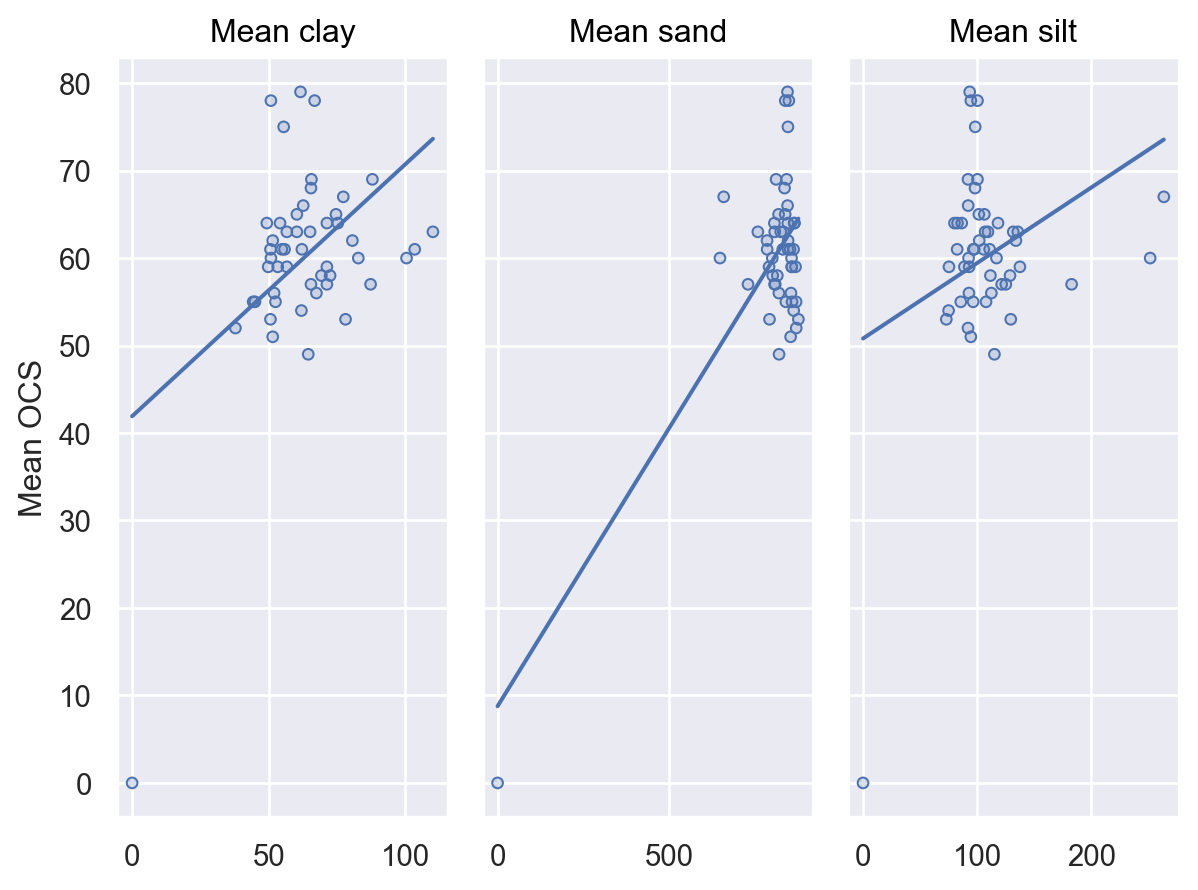

In [5]:
sg.plot_ocs_property_relationships()

## Disclaimers

*   Use of this package is subject to [ISRIC data and software policy](https://www.isric.org/about/data-policy).
*   This package is licensed as [GPL-2](LICENSE).